In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

%matplotlib inline

In [3]:
df= pd.read_csv('drive/My Drive/Cópia de Grande_Base_4.csv', encoding='latin1')

#Tratamento

In [4]:
df.head()

,CD_PROGRAMA_IES,AN_BASE,CD_AREA_AVALIACAO,IB_Total_docentes,IB_Mulheres,IB_Homens,IB_Brasileiros,IB_Estrangeiros,IB_QTDE_Regime_Parcial,IB_QTDE_Regime_Integral,...,CD_CONCEITO_PROGRAMA,UF_NM_MODALIDADE_PROGRAMA,UF_Qtd_Proj,UF_Outros projetos,UF_Qtd_Financiamentos,UF_BOLSA,UF_OUTRO AUXILIO FINANCEIRO,SEM AUXILIO,UF_DS_DEPENDENCIA_ADMINISTRATIVA,UF_QTD_FINANCIADORES
0,10001018002P1,2013,9,25,10,15,25,0,16,9,...,3,1,19,2.0,16,1.0,15.0,0.0,1,3
1,10001018002P1,2014,9,22,8,14,22,0,16,6,...,3,1,26,3.0,20,1.0,19.0,0.0,1,3
2,10001018002P1,2015,9,22,8,14,22,0,15,5,...,3,1,26,3.0,19,1.0,18.0,0.0,1,3
3,10001018002P1,2016,9,20,7,13,20,0,14,4,...,3,1,40,5.0,32,2.0,30.0,0.0,1,4
4,10001018002P1,2017,9,22,8,14,22,0,16,4,...,4,1,68,7.0,58,6.0,52.0,0.0,1,4


In [5]:
df.shape

(20141, 55)

In [6]:

df.isnull().sum().head(60)

CD_PROGRAMA_IES                        0
AN_BASE                                0
CD_AREA_AVALIACAO                      0
IB_Total_docentes                      0
IB_Mulheres                            0
IB_Homens                              0
IB_Brasileiros                         0
IB_Estrangeiros                        0
IB_QTDE_Regime_Parcial                 0
IB_QTDE_Regime_Integral                0
IB_QTDE_Regime_Exclusivo               0
IB_QTDE_Prof_Doutor                    0
IB_QTDE_Prof_NaoDoutor                 0
IB_QTDE_titulados_Brasil               0
IB_QTDE_titulados_Exterior             0
IB_Profs_Colaboradores                 0
IB_Profs_ServidoresPublicos            0
IB_Profs_VinculoCLT                    0
IB_Profs_Aposentados                   0
IB_Profs_BolsaDeFixacao                0
IB_Total_cursos                        0
MEDIA_CONCEITO_CURSO                   0
ID_SUBTIPO_PRODUCAO                    0
NM_SUBTIPO_PRODUCAO                    0
IN_TRABALHO_MESM

In [7]:
df['NM_SUBTIPO_PRODUCAO'].unique()

array(['TESE', 'DISSERTAÇÃO',
       'PROJETO DE APLICAÇÃO OU ADEQUAÇÃO TECNOLÓGICA',
       'PROPOSTA DE INTERVENÇÃO EM PROCEDIMENTOS CLÍNICOS OU DE SERVIÇO PERTINENTE',
       'ARTIGO', 'MATERIAL DIDÁTICO E INSTRUCIONAL',
       'RELATÓRIO FINAL DE PESQUISA', 'PROJETO TÉCNICO',
       'PROPOSTA PEDAGÓGICA', 'PRODUTO, PROCESSO OU TÉCNICA',
       'PROJETO DE INOVAÇÃO TECNOLÓGICA', 'PATENTE',
       'PROCESSO DE CRIAÇÃO', 'OUTROS', 'SOFTWARE',
       'REGISTRO DE PROPRIEDADE INTELECTUAL', 'ESTUDO DE CASO',
       'REVISÃO SISTEMÁTICA E APROFUNDADA DA LITERATURA',
       'PROTOCOLO EXPERIMENTAL OU DE APLICAÇÃO EM SERVIÇOS',
       'MANUAL DE OPERAÇÃO TÉCNICA',
       'RELATÓRIO TÉCNICO COM REGRAS DE SIGILO', 'EDITORIA',
       'PUBLICAÇÃO TECNOLÓGICA', 'PRODUÇÃO ARTÍSTICA',
       'PROTÓTIPO PARA DESENVOLVIMENTO OU PRODUÇÃO DE INSTRUMENTOS',
       'PRODUÇÃO DE PROGRAMAS DE MÍDIA'], dtype=object)

In [8]:
df =df.dropna(axis=0, how= 'any', thresh=None, subset=None, inplace=False)

In [9]:
df1 = df.copy()

In [10]:
df1['SG_UF_PROGRAMA'].unique()


array(['RO', 'AC', 'AM', 'RR', 'AP', 'PA', 'TO', 'MA', 'PI', 'CE', 'SE',
       'RN', 'PB', 'PE', 'BA', 'AL', 'ES', 'RJ', 'PR', 'MG', 'SP', 'SC',
       'RS', 'MT', 'MS', 'GO', 'DF'], dtype=object)

In [11]:
df1 = df1.drop(columns=['SG_UF_PROGRAMA','SG_ENTIDADE_ENSINO'])

In [12]:
df1['CS_STATUS_JURIDICO'].unique()

array(['FEDERAL', 'PARTICULAR', 'ESTADUAL', 'MUNICIPAL'], dtype=object)

In [13]:
df1.loc[df1['CS_STATUS_JURIDICO'] == 'FEDERAL', 'CS_STATUS_JURIDICO'] = 0
df1.loc[df1['CS_STATUS_JURIDICO'] == 'PARTICULAR', 'CS_STATUS_JURIDICO'] = 1
df1.loc[df1['CS_STATUS_JURIDICO'] == 'ESTADUAL', 'CS_STATUS_JURIDICO'] = 2
df1.loc[df1['CS_STATUS_JURIDICO'] == 'MUNICIPAL', 'CS_STATUS_JURIDICO'] = 3




In [14]:
df1['CS_STATUS_JURIDICO'].unique()

array([0, 1, 2, 3], dtype=object)

In [15]:
df1.head()

,CD_PROGRAMA_IES,AN_BASE,CD_AREA_AVALIACAO,IB_Total_docentes,IB_Mulheres,IB_Homens,IB_Brasileiros,IB_Estrangeiros,IB_QTDE_Regime_Parcial,IB_QTDE_Regime_Integral,...,CD_CONCEITO_PROGRAMA,UF_NM_MODALIDADE_PROGRAMA,UF_Qtd_Proj,UF_Outros projetos,UF_Qtd_Financiamentos,UF_BOLSA,UF_OUTRO AUXILIO FINANCEIRO,SEM AUXILIO,UF_DS_DEPENDENCIA_ADMINISTRATIVA,UF_QTD_FINANCIADORES
1,10001018002P1,2014,9,22,8,14,22,0,16,6,...,3,1,26,3.0,20,1.0,19.0,0.0,1,3
6,10001018004P4,2013,45,38,11,27,38,0,3,32,...,4,1,47,2.0,28,0.0,28.0,0.0,1,4
7,10001018004P4,2014,45,37,10,27,37,0,2,32,...,4,1,44,1.0,26,0.0,26.0,0.0,1,4
8,10001018004P4,2015,45,30,8,22,30,0,3,24,...,4,1,41,1.0,21,0.0,21.0,0.0,1,4
9,10001018004P4,2016,45,29,8,21,29,0,3,23,...,4,1,37,1.0,19,0.0,19.0,0.0,1,3


In [16]:
df1.isnull().sum()

CD_PROGRAMA_IES                     0
AN_BASE                             0
CD_AREA_AVALIACAO                   0
IB_Total_docentes                   0
IB_Mulheres                         0
IB_Homens                           0
IB_Brasileiros                      0
IB_Estrangeiros                     0
IB_QTDE_Regime_Parcial              0
IB_QTDE_Regime_Integral             0
IB_QTDE_Regime_Exclusivo            0
IB_QTDE_Prof_Doutor                 0
IB_QTDE_Prof_NaoDoutor              0
IB_QTDE_titulados_Brasil            0
IB_QTDE_titulados_Exterior          0
IB_Profs_Colaboradores              0
IB_Profs_ServidoresPublicos         0
IB_Profs_VinculoCLT                 0
IB_Profs_Aposentados                0
IB_Profs_BolsaDeFixacao             0
IB_Total_cursos                     0
MEDIA_CONCEITO_CURSO                0
ID_SUBTIPO_PRODUCAO                 0
NM_SUBTIPO_PRODUCAO                 0
IN_TRABALHO_MESMA_AREA              0
NR_PAGINAS                          0
GUS_Lingua_e

In [17]:
df1['NM_REGIAO'].unique()

array(['NORTE', 'NORDESTE', 'SUDESTE', 'SUL', 'CENTRO-OESTE'],
      dtype=object)

In [18]:
df1.loc[df1['NM_REGIAO'] == 'NORTE', 'NM_REGIAO'] = 0

In [19]:
df1.loc[df1['NM_REGIAO'] == 'SUL', 'NM_REGIAO'] = 1
df1.loc[df1['NM_REGIAO'] == 'SUDESTE', 'NM_REGIAO'] = 2
df1.loc[df1['NM_REGIAO'] == 'NORDESTE', 'NM_REGIAO'] = 3
df1.loc[df1['NM_REGIAO'] == 'CENTRO-OESTE', 'NM_REGIAO'] = 4

In [20]:

pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

In [21]:
df1.head(5)

,CD_PROGRAMA_IES,AN_BASE,CD_AREA_AVALIACAO,IB_Total_docentes,IB_Mulheres,IB_Homens,IB_Brasileiros,IB_Estrangeiros,IB_QTDE_Regime_Parcial,IB_QTDE_Regime_Integral,IB_QTDE_Regime_Exclusivo,IB_QTDE_Prof_Doutor,IB_QTDE_Prof_NaoDoutor,IB_QTDE_titulados_Brasil,IB_QTDE_titulados_Exterior,IB_Profs_Colaboradores,IB_Profs_ServidoresPublicos,IB_Profs_VinculoCLT,IB_Profs_Aposentados,IB_Profs_BolsaDeFixacao,IB_Total_cursos,MEDIA_CONCEITO_CURSO,ID_SUBTIPO_PRODUCAO,NM_SUBTIPO_PRODUCAO,IN_TRABALHO_MESMA_AREA,NR_PAGINAS,GUS_Lingua_estrangeira,GUS_Quantidade_Trabalhos,AN_NASCIMENTO_DOCENTE,GUS_Dis_Homens,GUS_Dis_Mulheres,GUS_Dis_Brasileiros,GUS_Dis_Estrangeiros,GUS_diferenca_idade,GUS_razao_aluno_prof,GUS_Quantidade_Discentes,GUS_Dis_Prop_Homens,GUS_Dis_Aluno_Tempo,QT_MES_TITULACAO,GUS_pag_por_aluno,CS_STATUS_JURIDICO,AN_NASCIMENTO_DISCENTE,NM_REGIAO,CD_CONCEITO_PROGRAMA,UF_NM_MODALIDADE_PROGRAMA,UF_Qtd_Proj,UF_Outros projetos,UF_Qtd_Financiamentos,UF_BOLSA,UF_OUTRO AUXILIO FINANCEIRO,SEM AUXILIO,UF_DS_DEPENDENCIA_ADMINISTRATIVA,UF_QTD_FINANCIADORES
1,10001018002P1,2014,9,22,8,14,22,0,16,6,0,22,0,20,2,12,7,0,3,0,2,3.0,2.0,TESE,1.0,80.000000,0,13,1966.954545,26,43,68,1,16.320817,3.136364,69,0.376812,2.193154,31.461538,3.636364,0,1983.275362,0,3,1,26,3.0,20,1.0,19.0,0.0,1,3
6,10001018004P4,2013,45,38,11,27,38,0,3,32,3,38,0,35,3,1,26,10,1,0,2,4.0,2.0,DISSERTAÇÃO,1.0,87.600000,0,15,1963.684211,24,48,72,0,17.815789,1.894737,72,0.333333,2.416107,29.800000,2.305263,0,1981.500000,0,4,1,47,2.0,28,0.0,28.0,0.0,1,4
7,10001018004P4,2014,45,37,10,27,37,0,2,32,3,37,0,34,3,1,25,10,1,0,2,4.0,2.0,DISSERTAÇÃO,1.0,87.000000,0,10,1963.729730,20,42,62,0,17.318657,1.675676,62,0.322581,2.254545,27.500000,2.351351,0,1981.048387,0,4,1,44,1.0,26,0.0,26.0,0.0,1,4
8,10001018004P4,2015,45,30,8,22,30,0,3,24,3,30,0,30,0,3,19,8,0,0,2,4.0,2.0,DISSERTAÇÃO,1.0,87.555556,0,18,1967.733333,24,48,72,0,13.850000,2.400000,72,0.333333,2.854626,25.222222,2.918519,0,1981.583333,0,4,1,41,1.0,21,0.0,21.0,0.0,1,4
9,10001018004P4,2016,45,29,8,21,29,0,3,23,3,29,0,29,0,3,18,8,0,0,2,4.0,2.0,TESE,1.0,81.230769,0,13,1968.103448,27,40,66,1,13.299537,2.310345,67,0.402985,2.399449,27.923077,2.801061,0,1981.402985,0,4,1,37,1.0,19,0.0,19.0,0.0,1,3


#ESCALOMENTO (Normalização/Redução)




In [22]:
from sklearn.preprocessing import StandardScaler

In [23]:
f_escalonamento= StandardScaler()
D_escalonados= f_escalonamento.fit_transform(df1.drop(['CD_PROGRAMA_IES', 'NM_SUBTIPO_PRODUCAO'], inplace=False, axis = 1))

In [24]:
from sklearn.decomposition import PCA

In [25]:
f_PCA= PCA( n_components=2 )
d_PCA= f_PCA.fit_transform(D_escalonados)

In [26]:
d_PCA[0:5]

array([[-0.62747664, -1.84107741],
       [ 1.69643468, -1.68567194],
       [ 1.22913198, -1.78987958],
       [ 0.21450827, -1.39928091],
       [-0.11085383, -1.46514967]])

#COTOVELO

In [27]:
from sklearn.cluster import KMeans

In [28]:
distancia = []
repeticoes = range(1,20)
for x in repeticoes:
  modelo = KMeans(n_clusters=x)
  modelo.fit(D_escalonados)
  distancia.append(modelo.inertia_)

In [29]:
print(distancia)

[958646.999999997, 811637.3431844574, 752844.3750069242, 712985.3439202072, 688413.4662925524, 669695.1240836777, 656418.9269945314, 641104.5379133997, 630688.9892678298, 618905.5322371097, 607781.1736510713, 597819.0251319852, 588752.6755051641, 579549.1019207853, 569921.4821609325, 567491.1993575054, 557958.5948541501, 549163.2126110492, 542811.3339669567]


Text(0, 0.5, 'distancia do cluster')

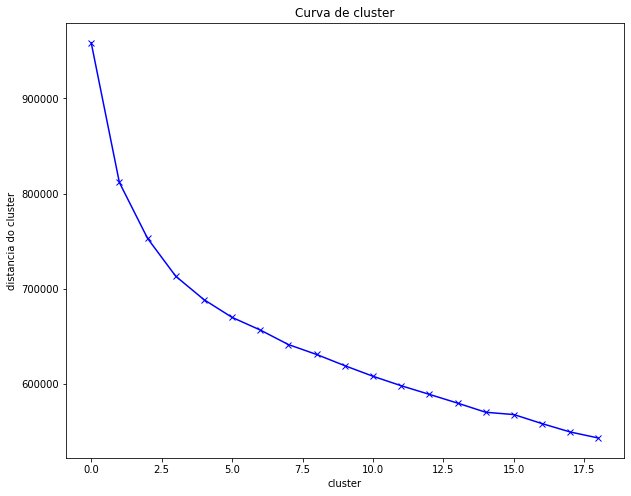

In [30]:
plt.figure(figsize=(10,8))
plt.title('Curva de cluster')
plt.plot(distancia, 'bx-')
plt.xlabel('cluster')
plt.ylabel('distancia do cluster')

In [31]:
import math

In [32]:
def optimal_number_of_clusters(wcss):
    x1, y1 = 2, wcss[0]
    x2, y2 = 20, wcss[len(wcss)-1]

    distances = []
    for i in range(len(wcss)):
        x0 = i+2
        y0 = wcss[i]
        numerator = abs((y2-y1)*x0 - (x2-x1)*y0 + x2*y1 - y2*x1)
        denominator = math.sqrt((y2 - y1)**2 + (x2 - x1)**2)
        distances.append(numerator/denominator)
    
    return distances.index(max(distances)) + 2

In [33]:
optimal_number_of_clusters(distancia)

6

#CLUSTERIZAÇÃO

In [34]:
modelo=KMeans(n_clusters=6)
modelo.fit(D_escalonados)
centroides= modelo.cluster_centers_

In [35]:
rotulos = modelo.labels_

In [36]:
rotulos

array([5, 5, 5, ..., 2, 1, 2], dtype=int32)

In [37]:
B_PCA=pd.DataFrame(data = d_PCA, columns=['Eixo_1', 'Eixo_2'])

In [38]:
B_PCA.head()

,Eixo_1,Eixo_2
0,-0.627477,-1.841077
1,1.696435,-1.685672
2,1.229132,-1.789880
3,0.214508,-1.399281
4,-0.110854,-1.465150


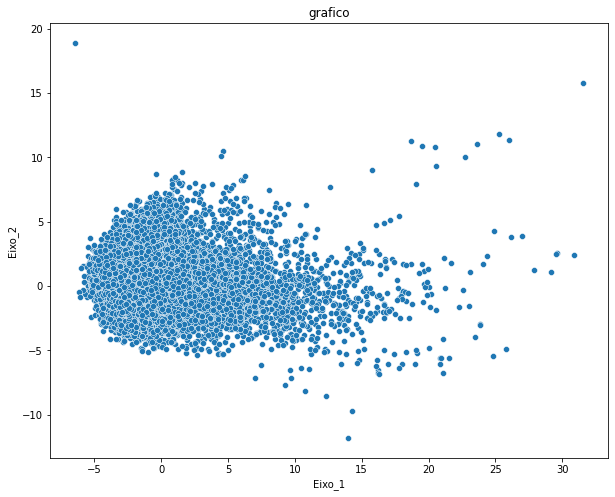

In [39]:
plt.figure(figsize=(10,8))
plt.title('grafico')
sns.scatterplot(x='Eixo_1', y = 'Eixo_2', data =B_PCA)

In [40]:
A =  pd.concat([B_PCA, pd.DataFrame({'Cluster': rotulos})], axis = 1)
A.head()
A.shape

(18797, 3)

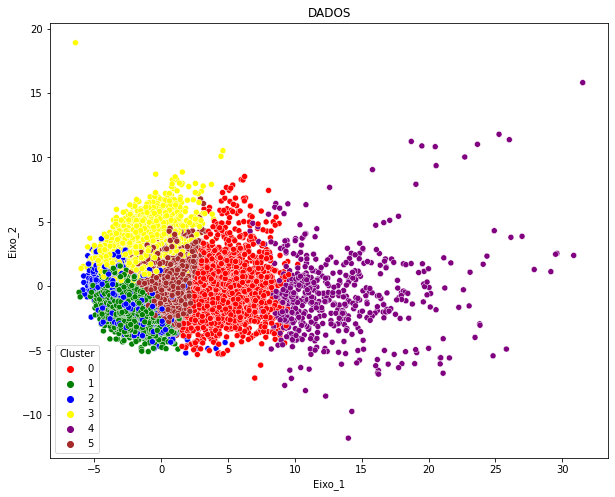

In [41]:
paletas_cores =['red', 'green', 'blue', 'yellow', 'purple', 'brown']
plt.figure(figsize=(10,8))
plt.title('DADOS')
sns.scatterplot(x='Eixo_1', y ='Eixo_2', hue='Cluster', data = A, palette=paletas_cores[0:7] )

Próximos passos:

*   Matriz correlação
*   Filtrar base
*   Aplicar cluster na base filtrada



*   make blobs
*   testar outro metodo
*   TSNE
*   INTERPRETABLE MACHINE LEARNING





#ANÁLISE CLUSTERS


In [42]:
df['cluster']= rotulos

In [43]:
df1['cluster']=rotulos

In [44]:
df.shape

(18797, 56)

In [45]:
df.isnull().sum()

CD_PROGRAMA_IES                     0
AN_BASE                             0
CD_AREA_AVALIACAO                   0
IB_Total_docentes                   0
IB_Mulheres                         0
IB_Homens                           0
IB_Brasileiros                      0
IB_Estrangeiros                     0
IB_QTDE_Regime_Parcial              0
IB_QTDE_Regime_Integral             0
IB_QTDE_Regime_Exclusivo            0
IB_QTDE_Prof_Doutor                 0
IB_QTDE_Prof_NaoDoutor              0
IB_QTDE_titulados_Brasil            0
IB_QTDE_titulados_Exterior          0
IB_Profs_Colaboradores              0
IB_Profs_ServidoresPublicos         0
IB_Profs_VinculoCLT                 0
IB_Profs_Aposentados                0
IB_Profs_BolsaDeFixacao             0
IB_Total_cursos                     0
MEDIA_CONCEITO_CURSO                0
ID_SUBTIPO_PRODUCAO                 0
NM_SUBTIPO_PRODUCAO                 0
IN_TRABALHO_MESMA_AREA              0
NR_PAGINAS                          0
GUS_Lingua_e

In [46]:
df.head()

,CD_PROGRAMA_IES,AN_BASE,CD_AREA_AVALIACAO,IB_Total_docentes,IB_Mulheres,IB_Homens,IB_Brasileiros,IB_Estrangeiros,IB_QTDE_Regime_Parcial,IB_QTDE_Regime_Integral,IB_QTDE_Regime_Exclusivo,IB_QTDE_Prof_Doutor,IB_QTDE_Prof_NaoDoutor,IB_QTDE_titulados_Brasil,IB_QTDE_titulados_Exterior,IB_Profs_Colaboradores,IB_Profs_ServidoresPublicos,IB_Profs_VinculoCLT,IB_Profs_Aposentados,IB_Profs_BolsaDeFixacao,IB_Total_cursos,MEDIA_CONCEITO_CURSO,ID_SUBTIPO_PRODUCAO,NM_SUBTIPO_PRODUCAO,IN_TRABALHO_MESMA_AREA,NR_PAGINAS,GUS_Lingua_estrangeira,GUS_Quantidade_Trabalhos,AN_NASCIMENTO_DOCENTE,SG_ENTIDADE_ENSINO,GUS_Dis_Homens,GUS_Dis_Mulheres,GUS_Dis_Brasileiros,GUS_Dis_Estrangeiros,GUS_diferenca_idade,GUS_razao_aluno_prof,GUS_Quantidade_Discentes,GUS_Dis_Prop_Homens,GUS_Dis_Aluno_Tempo,QT_MES_TITULACAO,GUS_pag_por_aluno,CS_STATUS_JURIDICO,AN_NASCIMENTO_DISCENTE,NM_REGIAO,SG_UF_PROGRAMA,CD_CONCEITO_PROGRAMA,UF_NM_MODALIDADE_PROGRAMA,UF_Qtd_Proj,UF_Outros projetos,UF_Qtd_Financiamentos,UF_BOLSA,UF_OUTRO AUXILIO FINANCEIRO,SEM AUXILIO,UF_DS_DEPENDENCIA_ADMINISTRATIVA,UF_QTD_FINANCIADORES,cluster
1,10001018002P1,2014,9,22,8,14,22,0,16,6,0,22,0,20,2,12,7,0,3,0,2,3.0,2.0,TESE,1.0,80.000000,0,13,1966.954545,UNIR,26,43,68,1,16.320817,3.136364,69,0.376812,2.193154,31.461538,3.636364,FEDERAL,1983.275362,NORTE,RO,3,1,26,3.0,20,1.0,19.0,0.0,1,3,5
6,10001018004P4,2013,45,38,11,27,38,0,3,32,3,38,0,35,3,1,26,10,1,0,2,4.0,2.0,DISSERTAÇÃO,1.0,87.600000,0,15,1963.684211,UNIR,24,48,72,0,17.815789,1.894737,72,0.333333,2.416107,29.800000,2.305263,FEDERAL,1981.500000,NORTE,RO,4,1,47,2.0,28,0.0,28.0,0.0,1,4,5
7,10001018004P4,2014,45,37,10,27,37,0,2,32,3,37,0,34,3,1,25,10,1,0,2,4.0,2.0,DISSERTAÇÃO,1.0,87.000000,0,10,1963.729730,UNIR,20,42,62,0,17.318657,1.675676,62,0.322581,2.254545,27.500000,2.351351,FEDERAL,1981.048387,NORTE,RO,4,1,44,1.0,26,0.0,26.0,0.0,1,4,5
8,10001018004P4,2015,45,30,8,22,30,0,3,24,3,30,0,30,0,3,19,8,0,0,2,4.0,2.0,DISSERTAÇÃO,1.0,87.555556,0,18,1967.733333,UNIR,24,48,72,0,13.850000,2.400000,72,0.333333,2.854626,25.222222,2.918519,FEDERAL,1981.583333,NORTE,RO,4,1,41,1.0,21,0.0,21.0,0.0,1,4,5
9,10001018004P4,2016,45,29,8,21,29,0,3,23,3,29,0,29,0,3,18,8,0,0,2,4.0,2.0,TESE,1.0,81.230769,0,13,1968.103448,UNIR,27,40,66,1,13.299537,2.310345,67,0.402985,2.399449,27.923077,2.801061,FEDERAL,1981.402985,NORTE,RO,4,1,37,1.0,19,0.0,19.0,0.0,1,3,5


In [47]:
df[df.cluster==0].describe()

,AN_BASE,CD_AREA_AVALIACAO,IB_Total_docentes,IB_Mulheres,IB_Homens,IB_Brasileiros,IB_Estrangeiros,IB_QTDE_Regime_Parcial,IB_QTDE_Regime_Integral,IB_QTDE_Regime_Exclusivo,IB_QTDE_Prof_Doutor,IB_QTDE_Prof_NaoDoutor,IB_QTDE_titulados_Brasil,IB_QTDE_titulados_Exterior,IB_Profs_Colaboradores,IB_Profs_ServidoresPublicos,IB_Profs_VinculoCLT,IB_Profs_Aposentados,IB_Profs_BolsaDeFixacao,IB_Total_cursos,MEDIA_CONCEITO_CURSO,ID_SUBTIPO_PRODUCAO,IN_TRABALHO_MESMA_AREA,NR_PAGINAS,GUS_Lingua_estrangeira,GUS_Quantidade_Trabalhos,AN_NASCIMENTO_DOCENTE,GUS_Dis_Homens,GUS_Dis_Mulheres,GUS_Dis_Brasileiros,GUS_Dis_Estrangeiros,GUS_diferenca_idade,GUS_razao_aluno_prof,GUS_Quantidade_Discentes,GUS_Dis_Prop_Homens,GUS_Dis_Aluno_Tempo,QT_MES_TITULACAO,GUS_pag_por_aluno,AN_NASCIMENTO_DISCENTE,CD_CONCEITO_PROGRAMA,UF_NM_MODALIDADE_PROGRAMA,UF_Qtd_Proj,UF_Outros projetos,UF_Qtd_Financiamentos,UF_BOLSA,UF_OUTRO AUXILIO FINANCEIRO,SEM AUXILIO,UF_DS_DEPENDENCIA_ADMINISTRATIVA,UF_QTD_FINANCIADORES,cluster
count,2987.000000,2987.000000,2987.000000,2987.000000,2987.000000,2987.000000,2987.000000,2987.000000,2987.000000,2987.000000,2987.000000,2987.00000,2987.000000,2987.000000,2987.000000,2987.000000,2987.000000,2987.000000,2987.000000,2987.000000,2987.000000,2987.000000,2987.000000,2987.000000,2987.000000,2987.000000,2987.000000,2987.000000,2987.000000,2987.000000,2987.000000,2987.000000,2987.000000,2987.000000,2987.000000,2987.000000,2987.000000,2987.000000,2987.000000,2987.000000,2987.000000,2987.000000,2987.000000,2987.000000,2987.000000,2987.000000,2987.000000,2987.000000,2987.000000,2987.0
mean,2015.585872,21.650151,34.785403,14.540007,20.245062,33.532307,1.253097,2.539672,24.537328,7.708403,34.607633,0.17777,28.949448,5.835956,1.711416,30.307332,1.761299,0.812521,0.192836,1.961500,5.298125,1.983930,0.849012,135.288765,0.923000,33.902243,1964.057906,71.989956,82.744560,151.195179,3.539337,19.383181,4.668577,154.734516,0.457744,4.376164,36.291219,4.067156,1983.441087,5.297288,0.985270,85.207231,5.931704,77.121192,40.067961,37.019083,0.034148,0.971878,5.248075,0.0
std,1.702675,14.303750,7.671667,8.147789,7.952610,7.519914,1.874196,3.864935,12.377796,10.892045,7.643736,0.50204,8.538620,4.636615,2.646969,9.305521,5.278538,1.576261,0.737687,0.192433,1.072360,0.125764,0.358097,49.274900,2.665443,12.976710,4.116710,42.365866,37.579913,50.520589,5.685852,3.796360,1.959301,50.907565,0.184195,1.665381,5.770841,1.698512,3.472923,1.072710,0.120492,58.755025,10.020543,63.326201,43.576984,34.347608,0.202560,0.165349,4.144379,0.0
min,2013.000000,1.000000,13.000000,0.000000,0.000000,11.000000,0.000000,0.000000,0.000000,0.000000,13.000000,0.00000,4.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2.500000,1.000000,0.000000,1.000000,0.000000,1.000000,1949.969697,5.000000,2.000000,18.000000,0.000000,7.735372,0.581395,25.000000,0.057471,0.831947,3.250000,0.032258,1970.472973,3.000000,0.000000,2.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.0
25%,2014.000000,9.000000,29.000000,8.000000,15.000000,28.000000,0.000000,0.000000,19.000000,0.000000,29.000000,0.00000,23.000000,2.000000,0.000000,25.000000,0.000000,0.000000,0.000000,2.000000,4.000000,2.000000,1.000000,99.241279,0.000000,25.000000,1961.207827,44.000000,59.000000,115.000000,0.000000,16.769619,3.375000,119.000000,0.324893,3.246359,32.688578,2.795102,1981.177995,4.000000,1.000000,46.000000,1.000000,33.000000,11.000000,12.000000,0.000000,1.000000,3.000000,0.0
50%,2016.000000,18.000000,34.000000,14.000000,20.000000,33.000000,1.000000,1.000000,27.000000,3.000000,34.000000,0.00000,29.000000,5.000000,1.000000,30.000000,0.000000,0.000000,0.000000,2.000000,5.000000,2.000000,1.000000,122.642857,0.000000,32.000000,1963.821429,62.000000,78.000000,145.000000,2.000000,19.362434,4.352941,148.000000,0.431818,4.157168,35.888889,3.713141,1983.821705,5.000000,1.000000,70.000000,3.000000,62.000000,27.000000,27.000000,0.000000,1.000000,4.000000,0.0
75%,2017.000000,36.000000,39.000000,20.000000

In [48]:
df[df.cluster==1].describe()

,AN_BASE,CD_AREA_AVALIACAO,IB_Total_docentes,IB_Mulheres,IB_Homens,IB_Brasileiros,IB_Estrangeiros,IB_QTDE_Regime_Parcial,IB_QTDE_Regime_Integral,IB_QTDE_Regime_Exclusivo,IB_QTDE_Prof_Doutor,IB_QTDE_Prof_NaoDoutor,IB_QTDE_titulados_Brasil,IB_QTDE_titulados_Exterior,IB_Profs_Colaboradores,IB_Profs_ServidoresPublicos,IB_Profs_VinculoCLT,IB_Profs_Aposentados,IB_Profs_BolsaDeFixacao,IB_Total_cursos,MEDIA_CONCEITO_CURSO,ID_SUBTIPO_PRODUCAO,IN_TRABALHO_MESMA_AREA,NR_PAGINAS,GUS_Lingua_estrangeira,GUS_Quantidade_Trabalhos,AN_NASCIMENTO_DOCENTE,GUS_Dis_Homens,GUS_Dis_Mulheres,GUS_Dis_Brasileiros,GUS_Dis_Estrangeiros,GUS_diferenca_idade,GUS_razao_aluno_prof,GUS_Quantidade_Discentes,GUS_Dis_Prop_Homens,GUS_Dis_Aluno_Tempo,QT_MES_TITULACAO,GUS_pag_por_aluno,AN_NASCIMENTO_DISCENTE,CD_CONCEITO_PROGRAMA,UF_NM_MODALIDADE_PROGRAMA,UF_Qtd_Proj,UF_Outros projetos,UF_Qtd_Financiamentos,UF_BOLSA,UF_OUTRO AUXILIO FINANCEIRO,SEM AUXILIO,UF_DS_DEPENDENCIA_ADMINISTRATIVA,UF_QTD_FINANCIADORES,cluster
count,5368.000000,5368.000000,5368.000000,5368.000000,5368.000000,5368.000000,5368.000000,5368.000000,5368.000000,5368.000000,5368.000000,5368.000000,5368.000000,5368.000000,5368.000000,5368.000000,5368.000000,5368.00000,5368.000000,5368.000000,5368.000000,5368.000000,5368.000000,5368.000000,5368.000000,5368.000000,5368.000000,5368.000000,5368.000000,5368.000000,5368.000000,5368.000000,5368.000000,5368.000000,5368.000000,5368.000000,5368.000000,5368.000000,5368.000000,5368.000000,5368.000000,5368.000000,5368.000000,5368.000000,5368.000000,5368.000000,5368.00000,5368.000000,5368.000000,5368.0
mean,2015.697094,26.569300,17.591841,7.125000,10.466841,17.226900,0.364940,1.210507,11.311475,5.069858,17.551788,0.040052,15.984538,1.607303,0.881334,15.815015,0.564270,0.13804,0.192996,1.218517,3.308774,1.990872,0.786699,107.015575,0.088674,12.434054,1969.109036,20.978949,26.356371,46.936662,0.398659,16.181062,2.780126,47.335320,0.445573,1.839223,26.182035,6.549608,1985.290098,3.301416,0.997392,37.203614,3.785768,22.505216,10.090723,12.350224,0.06427,0.983607,3.680514,1.0
std,1.697743,15.174878,4.605404,4.016714,4.482500,4.474128,0.807557,2.104151,6.542906,5.961913,4.612578,0.225283,4.531317,1.797053,1.400804,4.792067,1.886367,0.44540,0.558828,0.413279,0.501713,0.095113,0.409677,37.558256,0.477906,5.839998,4.455296,12.673676,13.687394,17.549347,1.111358,3.963097,1.047788,17.591065,0.198518,0.789945,4.030955,3.071058,3.257461,0.501221,0.051007,23.463796,4.910407,18.484968,10.999270,11.868131,0.61027,0.126995,2.106848,0.0
min,2013.000000,1.000000,5.000000,0.000000,0.000000,5.000000,0.000000,0.000000,0.000000,0.000000,5.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,1.000000,1.000000,1.000000,0.000000,1.000000,0.000000,1.000000,1953.428571,0.000000,0.000000,2.000000,0.000000,1.783117,0.090909,2.000000,0.000000,0.070175,2.000000,0.040000,1970.333333,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.00000,0.000000,1.000000,1.0
25%,2014.000000,12.000000,14.000000,4.000000,7.000000,14.000000,0.000000,0.000000,7.000000,0.000000,14.000000,0.000000,13.000000,0.000000,0.000000,13.000000,0.000000,0.00000,0.000000,1.000000,3.000000,2.000000,1.000000,78.641544,0.000000,9.000000,1966.198387,12.000000,17.000000,35.000000,0.000000,13.552279,2.049405,35.000000,0.302326,1.353329,24.000000,4.279040,1983.295752,3.000000,1.000000,21.000000,0.000000,9.000000,2.000000,4.000000,0.00000,1.000000,2.000000,1.0
50%,2016.000000,27.000000,17.000000,7.000000,10.000000,17.000000,0.000000,0.000000,12.000000,3.000000,17.000000,0.000000,16.000000,1.000000,0.000000,16.000000,0.000000,0.00000,0.000000,1.000000,3.000000,2.000000,1.000000,102.485294,0.000000,12.000000,1969.285714,19.000000,25.000000,44.000000,0.000000,16.044444,2.625000,45.000000,0.425532,1.733602,25.585784,5.910564,1985.653846,3.000000,1.000000,32.000000,2.000000,18.000000,7.000000,9.000000,0.00000,1.000000,3.000000,1.0
75%,2017.000000,41.000000,20.000000,10.000000,13.000000,20.000000,0.000000,

In [49]:
df[df.cluster==2].describe()

,AN_BASE,CD_AREA_AVALIACAO,IB_Total_docentes,IB_Mulheres,IB_Homens,IB_Brasileiros,IB_Estrangeiros,IB_QTDE_Regime_Parcial,IB_QTDE_Regime_Integral,IB_QTDE_Regime_Exclusivo,IB_QTDE_Prof_Doutor,IB_QTDE_Prof_NaoDoutor,IB_QTDE_titulados_Brasil,IB_QTDE_titulados_Exterior,IB_Profs_Colaboradores,IB_Profs_ServidoresPublicos,IB_Profs_VinculoCLT,IB_Profs_Aposentados,IB_Profs_BolsaDeFixacao,IB_Total_cursos,MEDIA_CONCEITO_CURSO,ID_SUBTIPO_PRODUCAO,IN_TRABALHO_MESMA_AREA,NR_PAGINAS,GUS_Lingua_estrangeira,GUS_Quantidade_Trabalhos,AN_NASCIMENTO_DOCENTE,GUS_Dis_Homens,GUS_Dis_Mulheres,GUS_Dis_Brasileiros,GUS_Dis_Estrangeiros,GUS_diferenca_idade,GUS_razao_aluno_prof,GUS_Quantidade_Discentes,GUS_Dis_Prop_Homens,GUS_Dis_Aluno_Tempo,QT_MES_TITULACAO,GUS_pag_por_aluno,AN_NASCIMENTO_DISCENTE,CD_CONCEITO_PROGRAMA,UF_NM_MODALIDADE_PROGRAMA,UF_Qtd_Proj,UF_Outros projetos,UF_Qtd_Financiamentos,UF_BOLSA,UF_OUTRO AUXILIO FINANCEIRO,SEM AUXILIO,UF_DS_DEPENDENCIA_ADMINISTRATIVA,UF_QTD_FINANCIADORES,cluster
count,1873.000000,1873.000000,1873.000000,1873.000000,1873.000000,1873.000000,1873.000000,1873.000000,1873.000000,1873.000000,1873.000000,1873.000000,1873.000000,1873.000000,1873.000000,1873.000000,1873.000000,1873.000000,1873.000000,1873.000000,1873.000000,1873.000000,1873.000000,1873.000000,1873.000000,1873.000000,1873.000000,1873.000000,1873.000000,1873.000000,1873.000000,1873.000000,1873.000000,1873.000000,1873.000000,1873.000000,1873.000000,1873.000000,1873.000000,1873.000000,1873.000000,1873.000000,1873.000000,1873.000000,1873.000000,1873.000000,1873.000000,1873.000000,1873.000000,1873.0
mean,2015.941805,30.700481,18.343300,8.345969,9.997330,18.000534,0.342766,2.826482,11.655099,3.861719,17.695675,0.647624,16.431393,1.911906,1.432461,11.232248,5.412707,0.159637,0.106247,1.009076,3.404164,7.794981,0.787507,108.929789,0.052856,13.948211,1966.830193,25.308062,27.880406,53.027229,0.161239,12.463827,3.010299,53.188468,0.469235,2.064216,26.311011,6.471749,1979.294021,3.404164,0.002136,33.334757,4.607048,16.036305,5.825414,10.044314,0.166578,0.669514,3.272290,2.0
std,1.651963,13.654094,6.282533,5.092615,4.983358,6.170867,0.751048,3.770571,7.016281,5.856692,5.825936,1.617121,5.917318,2.430274,2.399887,9.333561,7.365822,0.547561,0.671400,0.094862,0.620625,15.122528,0.409181,37.718897,0.545850,8.640740,4.555363,18.728225,17.661060,27.226178,0.910324,4.924112,1.376241,27.283594,0.215642,1.099203,4.464302,2.849159,3.917016,0.620625,0.046176,23.374953,6.575937,16.548322,8.596173,12.567836,1.830421,0.470514,2.593253,0.0
min,2013.000000,1.000000,6.000000,0.000000,0.000000,6.000000,0.000000,0.000000,0.000000,0.000000,5.000000,0.000000,4.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,1.000000,0.000000,1.000000,1951.750000,0.000000,0.000000,1.000000,0.000000,-6.206960,0.100000,1.000000,0.000000,0.027778,9.000000,0.058824,1965.457143,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2.0
25%,2015.000000,19.000000,14.000000,5.000000,7.000000,14.000000,0.000000,0.000000,7.000000,0.000000,14.000000,0.000000,13.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,3.000000,2.000000,1.000000,84.428571,0.000000,8.000000,1963.571429,13.000000,16.000000,36.000000,0.000000,9.287860,2.066667,36.000000,0.309524,1.356890,23.666667,4.396875,1976.632353,3.000000,0.000000,17.000000,0.000000,4.000000,1.000000,2.000000,0.000000,0.000000,2.000000,2.0
50%,2016.000000,29.000000,17.000000,8.000000,9.000000,17.000000,0.000000,1.000000,12.000000,1.000000,17.000000,0.000000,15.000000,1.000000,0.000000,13.000000,1.000000,0.000000,0.000000,1.000000,3.000000,2.000000,1.000000,108.000000,0.000000,13.000000,1966.857143,21.000000,25.000000,48.000000,0.000000,12.603846,2.846154,48.000000,0.454545,1.859649,25.750000,6.051282,1979.500000,3.000000,0.000000,27.000000,2.000000,11.000000,3.000000,6.000000,0.000000,1.000000,3.000000,2.0
75%,2017.000000,45.000000,21.000000,11.000000,13.000000,21.000000,0

In [50]:
df[df.cluster==3].describe()

,AN_BASE,CD_AREA_AVALIACAO,IB_Total_docentes,IB_Mulheres,IB_Homens,IB_Brasileiros,IB_Estrangeiros,IB_QTDE_Regime_Parcial,IB_QTDE_Regime_Integral,IB_QTDE_Regime_Exclusivo,IB_QTDE_Prof_Doutor,IB_QTDE_Prof_NaoDoutor,IB_QTDE_titulados_Brasil,IB_QTDE_titulados_Exterior,IB_Profs_Colaboradores,IB_Profs_ServidoresPublicos,IB_Profs_VinculoCLT,IB_Profs_Aposentados,IB_Profs_BolsaDeFixacao,IB_Total_cursos,MEDIA_CONCEITO_CURSO,ID_SUBTIPO_PRODUCAO,IN_TRABALHO_MESMA_AREA,NR_PAGINAS,GUS_Lingua_estrangeira,GUS_Quantidade_Trabalhos,AN_NASCIMENTO_DOCENTE,GUS_Dis_Homens,GUS_Dis_Mulheres,GUS_Dis_Brasileiros,GUS_Dis_Estrangeiros,GUS_diferenca_idade,GUS_razao_aluno_prof,GUS_Quantidade_Discentes,GUS_Dis_Prop_Homens,GUS_Dis_Aluno_Tempo,QT_MES_TITULACAO,GUS_pag_por_aluno,AN_NASCIMENTO_DISCENTE,CD_CONCEITO_PROGRAMA,UF_NM_MODALIDADE_PROGRAMA,UF_Qtd_Proj,UF_Outros projetos,UF_Qtd_Financiamentos,UF_BOLSA,UF_OUTRO AUXILIO FINANCEIRO,SEM AUXILIO,UF_DS_DEPENDENCIA_ADMINISTRATIVA,UF_QTD_FINANCIADORES,cluster
count,2511.000000,2511.000000,2511.000000,2511.000000,2511.000000,2511.000000,2511.000000,2511.000000,2511.000000,2511.000000,2511.000000,2511.000000,2511.000000,2511.000000,2511.000000,2511.000000,2511.000000,2511.000000,2511.000000,2511.000000,2511.000000,2511.000000,2511.000000,2511.000000,2511.000000,2511.000000,2511.000000,2511.000000,2511.000000,2511.000000,2511.000000,2511.000000,2511.000000,2511.000000,2511.000000,2511.000000,2511.000000,2511.000000,2511.000000,2511.000000,2511.000000,2511.000000,2511.000000,2511.000000,2511.000000,2511.000000,2511.000000,2511.000000,2511.000000,2511.0
mean,2015.565512,30.039825,15.778176,7.049383,8.728793,15.218240,0.559936,1.919156,13.194345,0.664675,15.729192,0.048984,13.193548,2.584628,0.790123,0.078455,14.741139,0.013142,0.155317,1.662286,4.086022,1.992433,0.838710,126.299779,0.342095,20.765432,1964.526757,38.376344,45.038232,82.784150,0.630426,14.442855,5.362600,83.414576,0.458831,2.858401,29.244442,8.585302,1978.969613,4.076862,0.955396,34.480287,2.015133,27.747113,14.912784,12.733174,0.101155,0.008363,4.002788,3.0
std,1.708774,12.231238,4.480566,3.774515,4.515767,4.305671,1.064593,2.461868,4.612522,2.309831,4.460712,0.235305,4.354415,2.812732,1.321052,0.858875,4.344055,0.141936,0.560103,0.473025,0.895411,0.086674,0.367872,56.973363,2.046972,11.648861,5.809227,25.138939,27.688279,41.106726,2.728267,5.170618,2.303622,41.305583,0.181267,1.323292,5.815011,4.451776,4.143155,0.902004,0.206473,25.289533,4.599126,26.378749,19.126668,13.389971,1.027182,0.091085,2.690472,0.0
min,2013.000000,1.000000,7.000000,0.000000,0.000000,6.000000,0.000000,0.000000,0.000000,0.000000,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,1.000000,0.000000,1.000000,1944.750000,2.000000,2.000000,5.000000,0.000000,-0.458333,0.562500,6.000000,0.048780,0.156250,6.500000,0.052632,1966.800000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,3.0
25%,2014.000000,22.000000,13.000000,4.000000,5.000000,12.000000,0.000000,0.000000,10.500000,0.000000,13.000000,0.000000,10.000000,1.000000,0.000000,0.000000,12.000000,0.000000,0.000000,1.000000,3.000000,2.000000,1.000000,94.181884,0.000000,13.000000,1960.733333,20.000000,26.000000,53.000000,0.000000,11.014442,3.674242,53.000000,0.315143,1.970522,24.912879,5.797180,1976.000000,3.000000,1.000000,19.000000,0.000000,9.000000,3.000000,3.000000,0.000000,0.000000,2.000000,3.0
50%,2016.000000,30.000000,15.000000,7.000000,8.000000,15.000000,0.000000,1.000000,13.000000,0.000000,15.000000,0.000000,13.000000,2.000000,0.000000,0.000000,14.000000,0.000000,0.000000,2.000000,4.000000,2.000000,1.000000,122.176471,0.000000,19.000000,1965.200000,31.000000,40.000000,75.000000,0.000000,14.334016,5.000000,76.000000,0.440000,2.597015,27.947368,8.333929,1978.957447,4.000000,1.000000,27.000000,0.000000,20.000000,8.000000,9.000000,0.000000,0.000000,3.000000,3.0
75%,2017.000000,40.000000,18.000000,10.000000,12.000000,18.00

In [51]:
df[df.cluster==4].describe()

,AN_BASE,CD_AREA_AVALIACAO,IB_Total_docentes,IB_Mulheres,IB_Homens,IB_Brasileiros,IB_Estrangeiros,IB_QTDE_Regime_Parcial,IB_QTDE_Regime_Integral,IB_QTDE_Regime_Exclusivo,IB_QTDE_Prof_Doutor,IB_QTDE_Prof_NaoDoutor,IB_QTDE_titulados_Brasil,IB_QTDE_titulados_Exterior,IB_Profs_Colaboradores,IB_Profs_ServidoresPublicos,IB_Profs_VinculoCLT,IB_Profs_Aposentados,IB_Profs_BolsaDeFixacao,IB_Total_cursos,MEDIA_CONCEITO_CURSO,ID_SUBTIPO_PRODUCAO,IN_TRABALHO_MESMA_AREA,NR_PAGINAS,GUS_Lingua_estrangeira,GUS_Quantidade_Trabalhos,AN_NASCIMENTO_DOCENTE,GUS_Dis_Homens,GUS_Dis_Mulheres,GUS_Dis_Brasileiros,GUS_Dis_Estrangeiros,GUS_diferenca_idade,GUS_razao_aluno_prof,GUS_Quantidade_Discentes,GUS_Dis_Prop_Homens,GUS_Dis_Aluno_Tempo,QT_MES_TITULACAO,GUS_pag_por_aluno,AN_NASCIMENTO_DISCENTE,CD_CONCEITO_PROGRAMA,UF_NM_MODALIDADE_PROGRAMA,UF_Qtd_Proj,UF_Outros projetos,UF_Qtd_Financiamentos,UF_BOLSA,UF_OUTRO AUXILIO FINANCEIRO,SEM AUXILIO,UF_DS_DEPENDENCIA_ADMINISTRATIVA,UF_QTD_FINANCIADORES,cluster
count,547.000000,547.000000,547.000000,547.000000,547.000000,547.000000,547.000000,547.000000,547.000000,547.000000,547.000000,547.000000,547.000000,547.000000,547.000000,547.000000,547.000000,547.000000,547.000000,547.000000,547.000000,547.000000,547.000000,547.000000,547.000000,547.000000,547.000000,547.000000,547.000000,547.000000,547.000000,547.000000,547.000000,547.000000,547.000000,547.000000,547.000000,547.000000,547.000000,547.000000,547.000000,547.000000,547.000000,547.000000,547.000000,547.000000,547.000000,547.000000,547.000000,547.0
mean,2015.552102,19.881170,64.301645,25.157221,39.144424,62.332724,1.968921,4.495430,44.934186,14.872029,63.813528,0.488117,52.530165,11.771481,2.610603,55.230347,3.945155,2.193784,0.321755,1.926874,5.722121,2.751371,0.815356,140.890040,3.727605,70.382084,1963.406794,176.023766,154.398537,321.851920,8.570384,19.179829,5.422192,330.422303,0.513979,9.604551,36.433757,2.312846,1982.586623,5.722121,0.945155,136.661792,7.652651,113.758684,56.385740,57.356490,0.016453,0.954296,5.850091,4.0
std,1.716791,14.294218,15.785839,15.225321,15.607103,15.214549,2.514599,5.917123,23.524970,21.259906,15.838180,0.965212,16.746125,9.121527,3.770927,18.276918,11.310499,3.580947,2.316279,0.260582,1.151335,6.053211,0.388363,43.422030,7.574346,35.873178,3.828186,122.166513,82.452863,140.166038,14.188813,4.177242,2.726352,143.295856,0.209929,6.375947,6.251830,0.891647,3.952283,1.151335,0.227885,87.045086,11.150158,105.295121,58.966676,71.709062,0.127328,0.209033,5.456070,0.0
min,2013.000000,1.000000,27.000000,1.000000,7.000000,27.000000,0.000000,0.000000,0.000000,0.000000,27.000000,0.000000,15.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,3.000000,1.000000,0.000000,39.598039,0.000000,6.000000,1954.044444,32.000000,17.000000,90.000000,0.000000,4.227754,1.216981,103.000000,0.214286,2.551499,1.142857,0.682725,1970.670940,3.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,4.0
25%,2014.000000,8.500000,53.000000,11.000000,28.000000,52.000000,0.000000,0.500000,32.000000,1.000000,52.000000,0.000000,41.000000,4.000000,0.000000,47.000000,0.000000,0.000000,0.000000,2.000000,5.000000,2.000000,1.000000,109.599631,0.000000,48.500000,1961.144156,88.000000,97.500000,232.000000,1.000000,16.633731,3.891583,237.000000,0.323158,6.311701,33.122500,1.617036,1979.808224,5.000000,1.000000,75.000000,1.000000,43.000000,16.000000,15.000000,0.000000,1.000000,3.000000,4.0
50%,2016.000000,15.000000,60.000000,24.000000,37.000000,59.000000,1.000000,2.000000,48.000000,5.000000,60.000000,0.000000,51.000000,10.000000,1.000000,54.000000,0.000000,1.000000,0.000000,2.000000,6.000000,2.000000,1.000000,131.494118,0.000000,63.000000,1963.263889,139.000000,147.000000,296.000000,4.000000,19.770408,4.978022,303.000000,0.453532,8.219780,36.206897,2.164832,1982.932584,6.000000,1.000000,115.000000,3.000000,90.000000,40.000000,41.000000,0.000000,1.000000,4.000000,4.0
75%,2017.000000,38.000000,73.500000,37.000000,47.000000,72.

In [52]:
df[df.cluster==5].describe()

,AN_BASE,CD_AREA_AVALIACAO,IB_Total_docentes,IB_Mulheres,IB_Homens,IB_Brasileiros,IB_Estrangeiros,IB_QTDE_Regime_Parcial,IB_QTDE_Regime_Integral,IB_QTDE_Regime_Exclusivo,IB_QTDE_Prof_Doutor,IB_QTDE_Prof_NaoDoutor,IB_QTDE_titulados_Brasil,IB_QTDE_titulados_Exterior,IB_Profs_Colaboradores,IB_Profs_ServidoresPublicos,IB_Profs_VinculoCLT,IB_Profs_Aposentados,IB_Profs_BolsaDeFixacao,IB_Total_cursos,MEDIA_CONCEITO_CURSO,ID_SUBTIPO_PRODUCAO,IN_TRABALHO_MESMA_AREA,NR_PAGINAS,GUS_Lingua_estrangeira,GUS_Quantidade_Trabalhos,AN_NASCIMENTO_DOCENTE,GUS_Dis_Homens,GUS_Dis_Mulheres,GUS_Dis_Brasileiros,GUS_Dis_Estrangeiros,GUS_diferenca_idade,GUS_razao_aluno_prof,GUS_Quantidade_Discentes,GUS_Dis_Prop_Homens,GUS_Dis_Aluno_Tempo,QT_MES_TITULACAO,GUS_pag_por_aluno,AN_NASCIMENTO_DISCENTE,CD_CONCEITO_PROGRAMA,UF_NM_MODALIDADE_PROGRAMA,UF_Qtd_Proj,UF_Outros projetos,UF_Qtd_Financiamentos,UF_BOLSA,UF_OUTRO AUXILIO FINANCEIRO,SEM AUXILIO,UF_DS_DEPENDENCIA_ADMINISTRATIVA,UF_QTD_FINANCIADORES,cluster
count,5511.000000,5511.000000,5511.000000,5511.000000,5511.000000,5511.000000,5511.000000,5511.000000,5511.000000,5511.000000,5511.000000,5511.000000,5511.000000,5511.000000,5511.000000,5511.000000,5511.000000,5511.000000,5511.000000,5511.000000,5511.000000,5511.000000,5511.000000,5511.000000,5511.000000,5511.000000,5511.000000,5511.000000,5511.000000,5511.000000,5511.000000,5511.000000,5511.000000,5511.000000,5511.000000,5511.000000,5511.000000,5511.000000,5511.000000,5511.000000,5511.000000,5511.000000,5511.000000,5511.000000,5511.000000,5511.000000,5511.000000,5511.0,5511.000000,5511.0
mean,2015.522410,25.600617,21.361277,9.146797,12.214480,20.722011,0.639267,1.445836,15.298312,4.617129,21.259118,0.102159,18.109599,3.251678,1.014698,18.959173,0.714026,0.517692,0.155507,1.960261,4.592089,1.972782,0.887316,130.417004,0.432408,20.466703,1964.405757,39.627654,52.520777,90.407186,1.741245,18.998400,4.464169,92.148430,0.424993,2.792812,34.175460,6.400964,1983.404157,4.592270,0.997823,49.173108,3.341317,41.303575,21.201960,20.057521,0.044094,1.0,4.102885,5.0
std,1.720327,14.270157,4.908153,5.030655,5.157985,4.818335,1.046892,2.143220,7.519962,6.605230,4.898497,0.363858,5.307732,2.998727,1.651365,4.793898,1.604853,1.069459,0.523795,0.195362,0.835142,0.162734,0.316234,48.394137,1.690401,8.015226,4.218380,22.755067,22.508129,30.021246,2.754143,3.617193,1.613811,30.181732,0.176139,1.056098,6.595323,2.725216,3.480241,0.833817,0.046617,31.262477,4.750489,31.215797,20.240013,19.488992,0.509490,0.0,2.494737,0.0
min,2013.000000,1.000000,7.000000,0.000000,0.000000,6.000000,0.000000,0.000000,0.000000,0.000000,7.000000,0.000000,2.000000,0.000000,0.000000,3.000000,0.000000,0.000000,0.000000,1.000000,2.500000,1.000000,0.000000,1.000000,0.000000,1.000000,1952.840000,1.000000,4.000000,7.000000,0.000000,5.116902,0.478261,8.000000,0.019048,0.133333,4.000000,0.055556,1967.793814,3.000000,0.000000,4.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.0,1.000000,5.0
25%,2014.000000,13.000000,18.000000,5.000000,9.000000,17.000000,0.000000,0.000000,12.000000,0.000000,18.000000,0.000000,14.000000,1.000000,0.000000,15.000000,0.000000,0.000000,0.000000,2.000000,4.000000,2.000000,1.000000,94.906926,0.000000,15.000000,1961.461538,23.000000,37.000000,69.000000,0.000000,16.481999,3.333333,71.000000,0.300000,2.083864,29.622241,4.396353,1981.180640,4.000000,1.000000,28.000000,0.000000,18.000000,6.000000,6.000000,0.000000,1.0,3.000000,5.0
50%,2016.000000,25.000000,21.000000,9.000000,12.000000,21.000000,0.000000,1.000000,16.000000,2.000000,21.000000,0.000000,18.000000,2.000000,0.000000,19.000000,0.000000,0.000000,0.000000,2.000000,4.000000,2.000000,1.000000,119.285714,0.000000,20.000000,1964.352941,35.000000,51.000000,87.000000,1.000000,18.894503,4.230769,89.000000,0.413043,2.676275,34.000000,5.931624,1983.821138,4.000000,1.000000,42.000000,1.000000,35.000000,15.000000,15.000000,0.000000,1.0,4.000000,5.0
75%,2017.000000,40.000000,25.000000,13.000000,16.000000,24.000000,1.000000,2.000000,20.0

In [53]:
#Cluster 5 e 2 apresentam as melhorres médias de notas, com 5.7 e 5.3
#Já o cluster 0 e o 3 apresentam as piores médias de notas com, 3.4 e 3.3
#cluster 4 e 1 se mantém na média com notas entre 4 e 5
#a quantidade de projetos de todos os cursos são proporcionais a sua nota, sendo o cluster 5 com a maior média de projetos e o 0 com menor número
#a quantidade de financimentos de todos os cursos também  são proporcionais a sua nota, sendo o cluster 5 com a maior média de financiamentos e o 0 com menor número


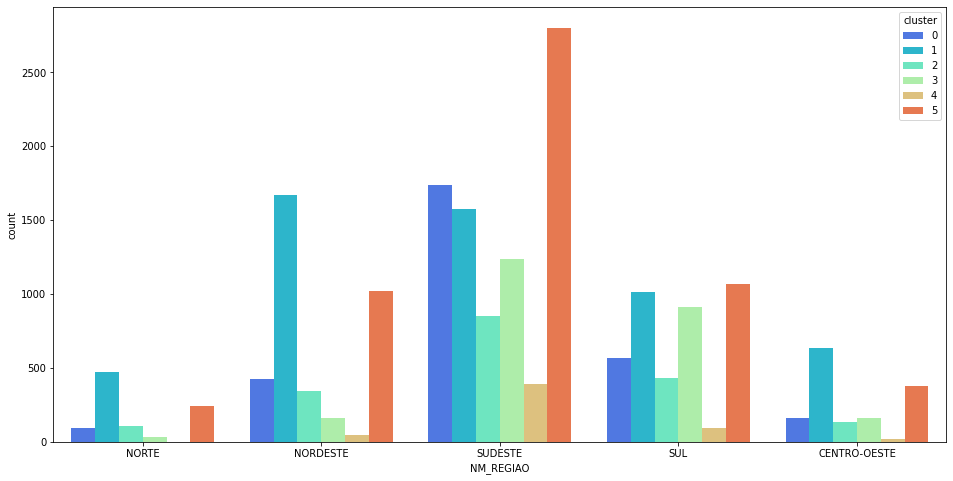

In [54]:
plt.figure(figsize=(16, 8))
sns.countplot(x = 'NM_REGIAO', data = df, hue = 'cluster', palette = 'rainbow')

In [55]:
#Cluster 5 mais concentrado na região sul e sudeste
#Cluster 1 bastante predominante na região sudeste
#regiões norte, centro-oeste e nordeste com maior predominância do cluster 3
#cluster 0 com maior concentração nas regiões nodeste sudeste e sul

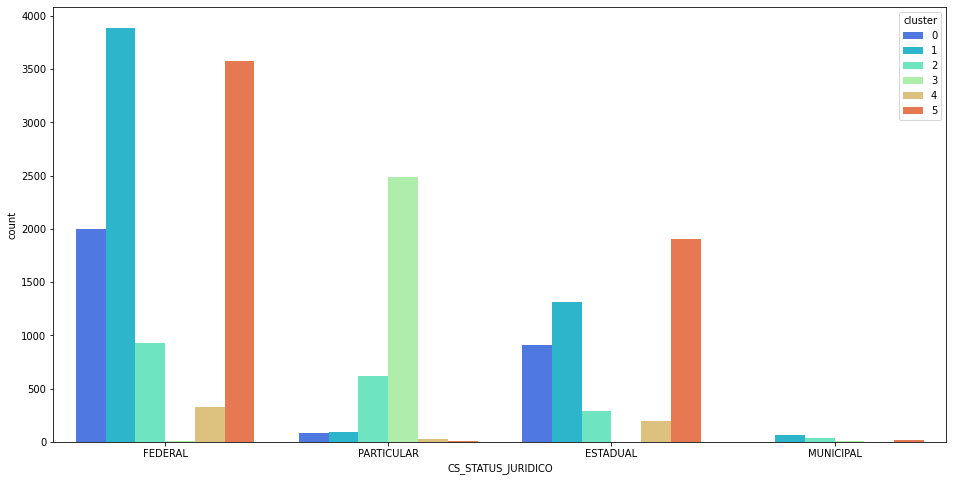

In [56]:
plt.figure(figsize=(16, 8))
sns.countplot(x = 'CS_STATUS_JURIDICO', data = df, hue = 'cluster', palette = 'rainbow')

In [57]:
#Cluster 5 sendo maior parte concentrada nas universidades particulares
#cluster 2 predominante nas universidads federais e estaduais, assim como o cluster 1
#cluster 0 possui sua maior parte nas federais e particulares
#cluster 4 mais concentrado nas federais e estaduais

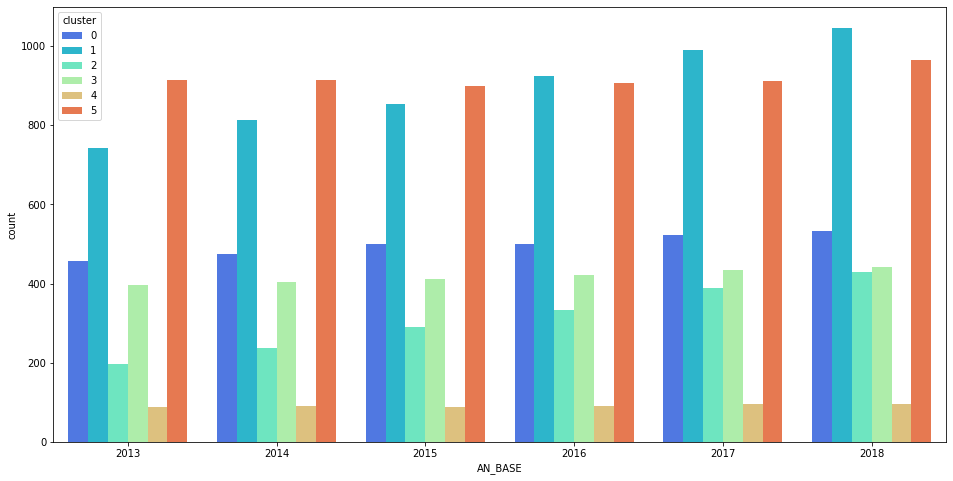

In [58]:
plt.figure(figsize=(16, 8))
sns.countplot(x = 'AN_BASE', data = df, hue = 'cluster', palette = 'rainbow')

In [59]:
#CLUSTER 5 E 3 VEM TENDO UMA EVOLUÇÃO DURANTE OS ANOS
#CLUSTER 0,1,2,4 SE MANTIVERAM CONSTANTES

In [65]:
(df.query('cluster==1'))['SG_ENTIDADE_ENSINO'].unique()

array(['UNIR', 'UFAC', 'UFAM', 'INPA', 'UEA', 'UFRR', 'FIOCRUZ-CPQLMD',
       'UNIFAP', 'UFPA', 'UFRA', 'UEPA', 'UFOPA', 'IEC', 'UNIFESSPA',
       'MPEG', 'UFT', 'UFMA', 'UEMA', 'IFMA/MC', 'IFMA - MC', 'UNICEUMA',
       'FUFPI', 'UFC', 'UESPI', 'UECE', 'UVA-CE', 'URCA', 'IFCE',
       'UNILAB', 'UFCA', 'UFRN', 'UERN', 'UFERSA', 'IFRN', 'UFPB/J.P.',
       'UFPB-JP', 'UFPE', 'UFPB/AREIA', 'UFPB/RT', 'UFPB-RT', 'UEPB',
       'IFPB', 'UFCG', 'UFRPE', 'FESP/UPE', 'UPE', 'UNIVASF', 'UFAL',
       'FUFSE', 'UFBA', 'UNIFACS', 'UEFS', 'UNEB', 'UESB', 'UESC',
       'EBMSP', 'UFRB', 'UFOB', 'UFES', 'IFES', 'UVV', 'UFRJ', 'UFRRJ',
       'UFF', 'UERJ', 'IME', 'FIOCRUZ', 'UNIRIO', 'CEFET/RJ', 'UENF',
       'UNIGRANRIO', 'IFRJ', 'IEN', 'INPI', 'INMETRO', 'ECEME', 'UFMG',
       'UFV', 'UNIFEI', 'UFLA', 'UFJF', 'UFU', 'UFOP', 'PUC/MG', 'UFVJM',
       'UNIFAL', 'UFTM', 'UNIMONTES', 'UNIFENAS', 'UFSJ', 'CEFET/MG',
       'UNINCOR', 'UEMG', 'UNIUBE', 'IFSUDESTEMG', 'UFSCAR', 'USP',
       'USP/R

In [61]:
# O cluster 0  e 3 apesar de terem os piores conceitos entre os clusters, está maior presente nas universidades federais e estaduais
# o cluster 4 apesar de ser predominantemente particular, não possui o menor conceito entre os clusteres

Próximos passos:
análisar profundamente o cluster 0,3,4


In [62]:
df5= df[df.cluster==5]

In [63]:
df3 = df[df.cluster==3]

In [64]:
df3 = df3.query('CD_CONCEITO_PROGRAMA<3.27')

In [66]:
df1 = df[df.cluster==1]

In [69]:
df1.groupby('SG_ENTIDADE_ENSINO').count()['CD_PROGRAMA_IES'].sort_values(ascending=False)

SG_ENTIDADE_ENSINO
UFG               150
FUFSE             141
FUFPI             119
UFPEL             118
UFMT              117
UFPA              117
UFAL              110
UFES              109
UFRN              108
UFPE              108
UFAM              105
UNIOESTE           98
UFMS               92
UFF                91
UFPR               90
UTFPR              88
UFU                86
UFBA               85
UFMA               84
UFV                82
UFRPE              82
UEL                81
UNB                80
UFSCAR             74
UFSJ               74
UFSM               74
UFC                70
UFJF               69
USP                68
UESC               67
UNIFAL             63
UFGD               63
UEM                62
UFPB/J.P.          62
UFABC              59
FURG               55
UEPB               54
UNICENTRO          54
UEFS               53
UECE               53
UERJ               53
UNIFESP            52
UFT                52
UDESC              52
UEPG         

In [70]:
df1.groupby('NM_SUBTIPO_PRODUCAO').count()['CD_PROGRAMA_IES'].sort_values(ascending=False)

NM_SUBTIPO_PRODUCAO
DISSERTAÇÃO    5024
TESE            344
Name: CD_PROGRAMA_IES, dtype: int64

In [71]:
df5.groupby('NM_SUBTIPO_PRODUCAO').count()['CD_PROGRAMA_IES'].sort_values(ascending=False)

NM_SUBTIPO_PRODUCAO
TESE           4623
DISSERTAÇÃO     888
Name: CD_PROGRAMA_IES, dtype: int64

In [72]:
path_ppg_2013 = ('drive/My Drive/br-capes-colsucup-prog-2013a2016-2020-06-12_2013.csv')
path_ppg_2014 = ('drive/My Drive/br-capes-colsucup-prog-2013a2016-2020-06-12_2014.csv')
path_ppg_2015 = ('drive/My Drive/br-capes-colsucup-prog-2013a2016-2020-06-12_2015.csv')
path_ppg_2016 = ('drive/My Drive/br-capes-colsucup-prog-2013a2016-2020-06-12_2016.csv')
path_ppg_2017 = ('drive/My Drive/br-capes-colsucup-prog-2017-2020-06-12.csv')
path_ppg_2018 = ('drive/My Drive/br-capes-colsucup-prog-2018-2020-06-12.csv')
 
df_ppg_2013 = pd.read_csv(path_ppg_2013, sep = ';', encoding = 'latin1')
df_ppg_2014 = pd.read_csv(path_ppg_2014, sep = ';', encoding = 'latin1')
df_ppg_2015 = pd.read_csv(path_ppg_2015, sep = ';', encoding = 'latin1')
df_ppg_2016 = pd.read_csv(path_ppg_2016, sep = ';', encoding = 'latin1')
df_ppg_2017 = pd.read_csv(path_ppg_2017, sep = ';', encoding = 'latin1')
df_ppg_2018 = pd.read_csv(path_ppg_2018, sep = ';', encoding = 'latin1')
 
ppg_final = pd.concat([df_ppg_2013, df_ppg_2014, df_ppg_2015, df_ppg_2016, df_ppg_2017, df_ppg_2018], axis = 0)

In [73]:
df1 = pd.merge(df1, ppg_final,  how='inner',  on = ['CD_PROGRAMA_IES', 'AN_BASE'])

In [74]:
ppg_final.head()

,AN_BASE,NM_GRANDE_AREA_CONHECIMENTO,NM_AREA_CONHECIMENTO,NM_SUBAREA_CONHECIMENTO,NM_ESPECIALIDADE,CD_AREA_AVALIACAO,NM_AREA_AVALIACAO,CD_ENTIDADE_CAPES,CD_ENTIDADE_EMEC,SG_ENTIDADE_ENSINO,NM_ENTIDADE_ENSINO,CS_STATUS_JURIDICO,DS_DEPENDENCIA_ADMINISTRATIVA,DS_ORGANIZACAO_ACADEMICA,NM_REGIAO,NM_MUNICIPIO_PROGRAMA_IES,NM_MODALIDADE_PROGRAMA,CD_PROGRAMA_IES,NM_PROGRAMA_IES,NM_PROGRAMA_IDIOMA,SG_UF_PROGRAMA,NM_GRAU_PROGRAMA,CD_CONCEITO_PROGRAMA,ANO_INICIO_PROGRAMA,AN_INICIO_CURSO,IN_REDE,SG_ENTIDADE_ENSINO_REDE,DS_SITUACAO_PROGRAMA,DT_SITUACAO_PROGRAMA,ID_ADD_FOTO_PROGRAMA_IES,ID_ADD_FOTO_PROGRAMA,DS_CLIENTELA_QUADRIENAL_2017,NM_AREA_BASICA,AN_INICIO_PROGRAMA
0,2013,CIÊNCIAS BIOLÓGICAS,PARASITOLOGIA,NÃO SE APLICA,NÃO SE APLICA,9,CIÊNCIAS BIOLÓGICAS III,10001018,699,UNIR,UNIVERSIDADE FEDERAL DE RONDÔNIA,FEDERAL,PÚBLICA,UNIVERSIDADE,NORTE,PORTO VELHO,ACADÊMICO,10001018002P1,BIOLOGIA EXPERIMENTAL,EXPERIMENTAL BIOLOGY,RO,MESTRADO/DOUTORADO,3,2001.0,2001/2005,NÃO,NaN,EM FUNCIONAMENTO,30DEC2013:00:00:00,115723,52357,AVALIAÇÃO,NaN,NaN
1,2013,MULTIDISCIPLINAR,INTERDISCIPLINAR,MEIO AMBIENTE E AGRÁRIAS,NÃO SE APLICA,45,INTERDISCIPLINAR,10001018,699,UNIR,UNIVERSIDADE FEDERAL DE RONDÔNIA,FEDERAL,PÚBLICA,UNIVERSIDADE,NORTE,PORTO VELHO,ACADÊMICO,10001018004P4,DESENVOLVIMENTO REGIONAL E MEIO AMBIENTE,PROGRAM POSGRADUATED IN THE DEVELOPMENT REGION...,RO,MESTRADO/DOUTORADO,4,1999.0,1999/2013,NÃO,NaN,EM FUNCIONAMENTO,13NOV2013:00:00:00,89585,28246,AVALIAÇÃO,NaN,NaN
2,2013,CIÊNCIAS HUMANAS,GEOGRAFIA,NÃO SE APLICA,NÃO SE APLICA,36,GEOGRAFIA,10001018,699,UNIR,UNIVERSIDADE FEDERAL DE RONDÔNIA,FEDERAL,PÚBLICA,UNIVERSIDADE,NORTE,PORTO VELHO,ACADÊMICO,10001018005P0,GEOGRAFIA,"MASTERS IN GEOGRAPHY, FEDERAL UNIVERSITY OF RO...",RO,MESTRADO/DOUTORADO,4,2006.0,2006/2015,NÃO,NaN,EM FUNCIONAMENTO,19JUN2013:00:00:00,114485,51206,AVALIAÇÃO,NaN,NaN
3,2013,CIÊNCIAS SOCIAIS APLICADAS,ADMINISTRAÇÃO,NÃO SE APLICA,NÃO SE APLICA,27,"ADMINISTRAÇÃO PÚBLICA E DE EMPRESAS, CIÊNCIAS ...",10001018,699,UNIR,UNIVERSIDADE FEDERAL DE RONDÔNIA,FEDERAL,PÚBLICA,UNIVERSIDADE,NORTE,PORTO VELHO,ACADÊMICO,10001018006P7,ADMINISTRAÇÃO,MASTER IN ADMINISTRATION,RO,MESTRADO,4,2006.0,2006,NÃO,NaN,EM FUNCIONAMENTO,30DEC2013:00:00:00,102520,40802,AVALIAÇÃO,NaN,NaN
4,2013,"LINGÜÍSTICA, LETRAS E ARTES",LINGÜÍSTICA,NÃO SE APLICA,NÃO SE APLICA,41,LETRAS / LINGUÍSTICA,10001018,699,UNIR,UNIVERSIDADE FEDERAL DE RONDÔNIA,FEDERAL,PÚBLICA,UNIVERSIDADE,NORTE,PORTO VELHO,ACADÊMICO,10001018008P0,CIÊNCIAS DA LINGUAGEM,GRADUATE PROGRAM IN LANGUAGE SCIENCES,RO,MESTRADO,2,2007.0,2007,NÃO,NaN,EM DESATIVACAO,29APR2014:00:00:00,56035,7487,NÃO,NaN,NaN


In [76]:
df1.groupby('NM_GRANDE_AREA_CONHECIMENTO').count()['CD_PROGRAMA_IES'].sort_values(ascending=False)

NM_GRANDE_AREA_CONHECIMENTO
MULTIDISCIPLINAR               848
CIÊNCIAS AGRÁRIAS              763
CIÊNCIAS HUMANAS               761
ENGENHARIAS                    641
CIÊNCIAS DA SAÚDE              590
CIÊNCIAS SOCIAIS APLICADAS     561
CIÊNCIAS EXATAS E DA TERRA     517
CIÊNCIAS BIOLÓGICAS            422
LINGÜÍSTICA, LETRAS E ARTES    265
Name: CD_PROGRAMA_IES, dtype: int64

In [77]:
df5 = pd.merge(df5, ppg_final,  how='inner',  on = ['CD_PROGRAMA_IES', 'AN_BASE'])

In [78]:
df5.groupby('NM_GRANDE_AREA_CONHECIMENTO').count()['CD_PROGRAMA_IES'].sort_values(ascending=False)

NM_GRANDE_AREA_CONHECIMENTO
CIÊNCIAS DA SAÚDE              1036
CIÊNCIAS AGRÁRIAS               871
CIÊNCIAS HUMANAS                764
MULTIDISCIPLINAR                571
CIÊNCIAS BIOLÓGICAS             560
CIÊNCIAS SOCIAIS APLICADAS      508
ENGENHARIAS                     505
CIÊNCIAS EXATAS E DA TERRA      381
LINGÜÍSTICA, LETRAS E ARTES     315
Name: CD_PROGRAMA_IES, dtype: int64